# Collective data analysis
The purpose of this project is to practice our data exploration and data visualization skills. We have 2 datasets with chemical properties of Potugese red and white wines from the Vinho Verde region.

### Read and clean data

In [ ]:
import pandas as pd
from WineDataExplorerPackage import *
from WineDataExplorerPackage import descriptive_statistics as ds
from WineDataExplorerPackage import plots as pl

red_wine_df = read_data_to_dataframe("data/winequality-red.xlsx", winetype="red")
white_wine_df = read_data_to_dataframe("data/winequality-white.xlsx", winetype="white")


We load the data into three dataframes, one for red wine, one for white and one dataframe combined from the previous two. The data has been checked for missing values and numeric values converted to numeric type.

### Descriptive statistics

In [3]:
red_wine_summary_df = ds.describe_wine_data(red_wine_df, verbose=True)

Summary: 1599 rows × 13 columns
                      count       mean        std      min     25%      50%       75%      max
feature                                                                                       
fixed acidity          1599   8.319637   1.741096      4.6     7.1      7.9       9.2     15.9
volatile acidity       1599   0.527821    0.17906     0.12    0.39     0.52      0.64     1.58
citric acid            1599   0.270976   0.194801      0.0    0.09     0.26      0.42      1.0
residual sugar         1599   2.538806   1.409928      0.9     1.9      2.2       2.6     15.5
chlorides              1599   0.087467   0.047065    0.012    0.07    0.079      0.09    0.611
free sulfur dioxide    1599  15.874922  10.460157      1.0     7.0     14.0      21.0     72.0
total sulfur dioxide   1599  46.467792  32.895324      6.0    22.0     38.0      62.0    289.0
density                1599   0.996747   0.001887  0.99007  0.9956  0.99675  0.997835  1.00369
pH                

In [4]:
white_wine_summary_df = ds.describe_wine_data(white_wine_df, verbose=True)

Summary: 4898 rows × 13 columns
                      count        mean        std      min       25%      50%     75%      max
feature                                                                                        
fixed acidity          4898    6.854788   0.843868      3.8       6.3      6.8     7.3     14.2
volatile acidity       4898    0.278241   0.100795     0.08      0.21     0.26    0.32      1.1
citric acid            4898    0.334192    0.12102      0.0      0.27     0.32    0.39     1.66
residual sugar         4898    6.391415   5.072058      0.6       1.7      5.2     9.9     65.8
chlorides              4898    0.045772   0.021848    0.009     0.036    0.043    0.05    0.346
free sulfur dioxide    4898   35.308085  17.007137      2.0      23.0     34.0    46.0    289.0
total sulfur dioxide   4898  138.360657  42.498065      9.0     108.0    134.0   167.0    440.0
density                4898    0.994027   0.002991  0.98711  0.991723  0.99374  0.9961  1.03898
pH      

It is difficult to compare the two dataset when looking at these tables, so we have decided to create whiskers boxplots to visualize them.

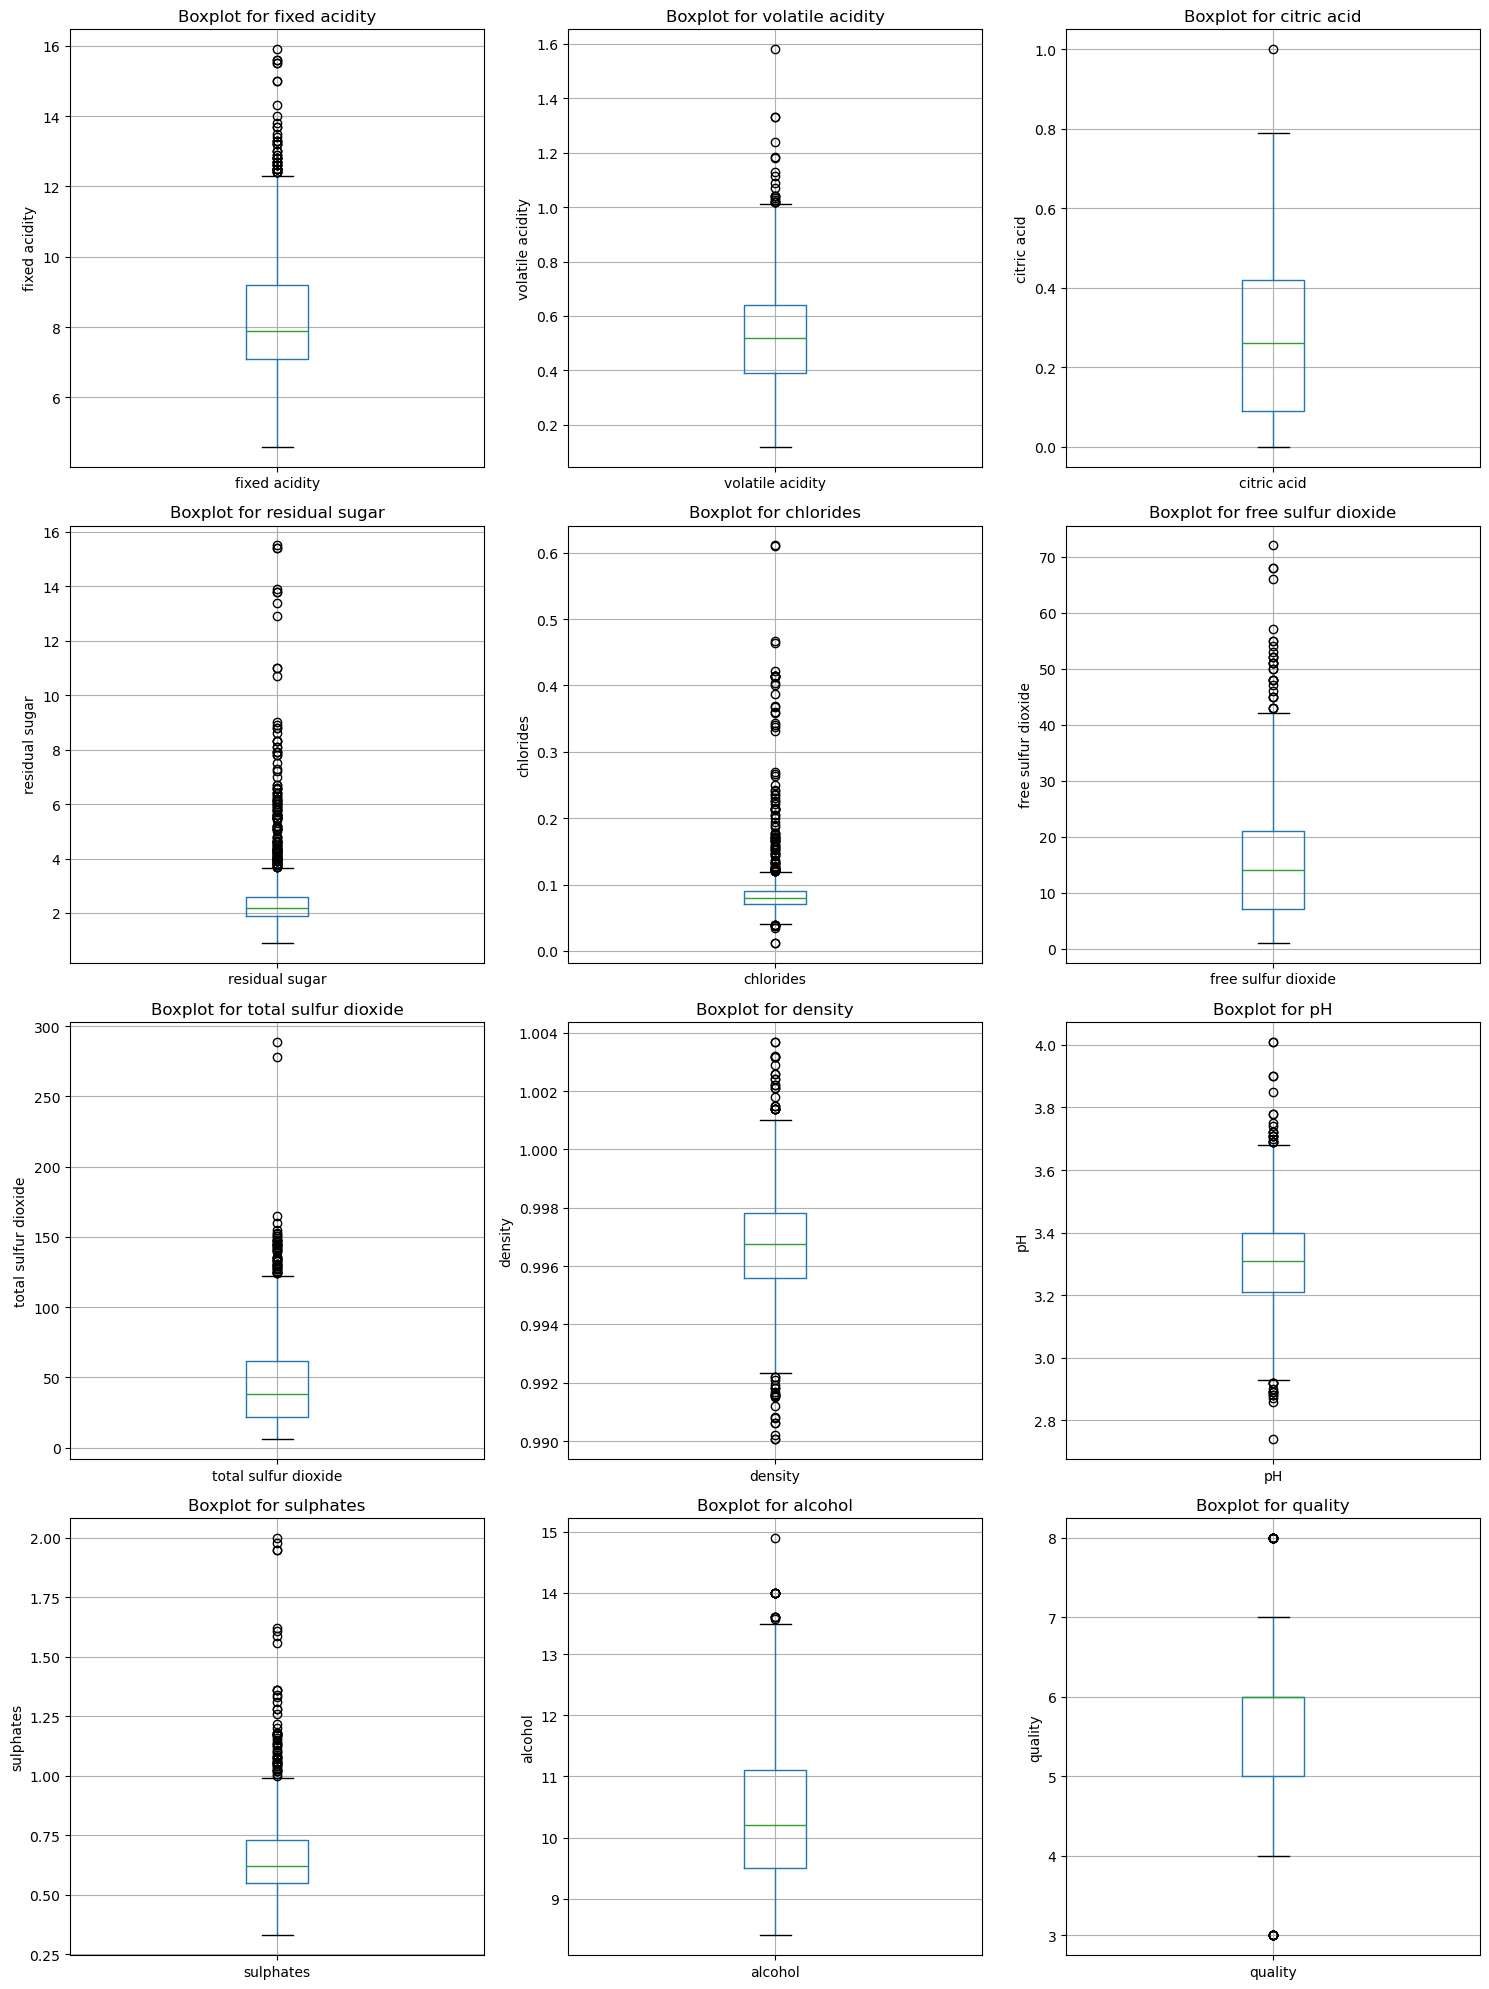

In [ ]:
pl.show_boxplots(red_wine_df, layout="grid")

We see there are some datapoints that are marked as outliers, we will have to do further analysis before deciding on how to handle those.

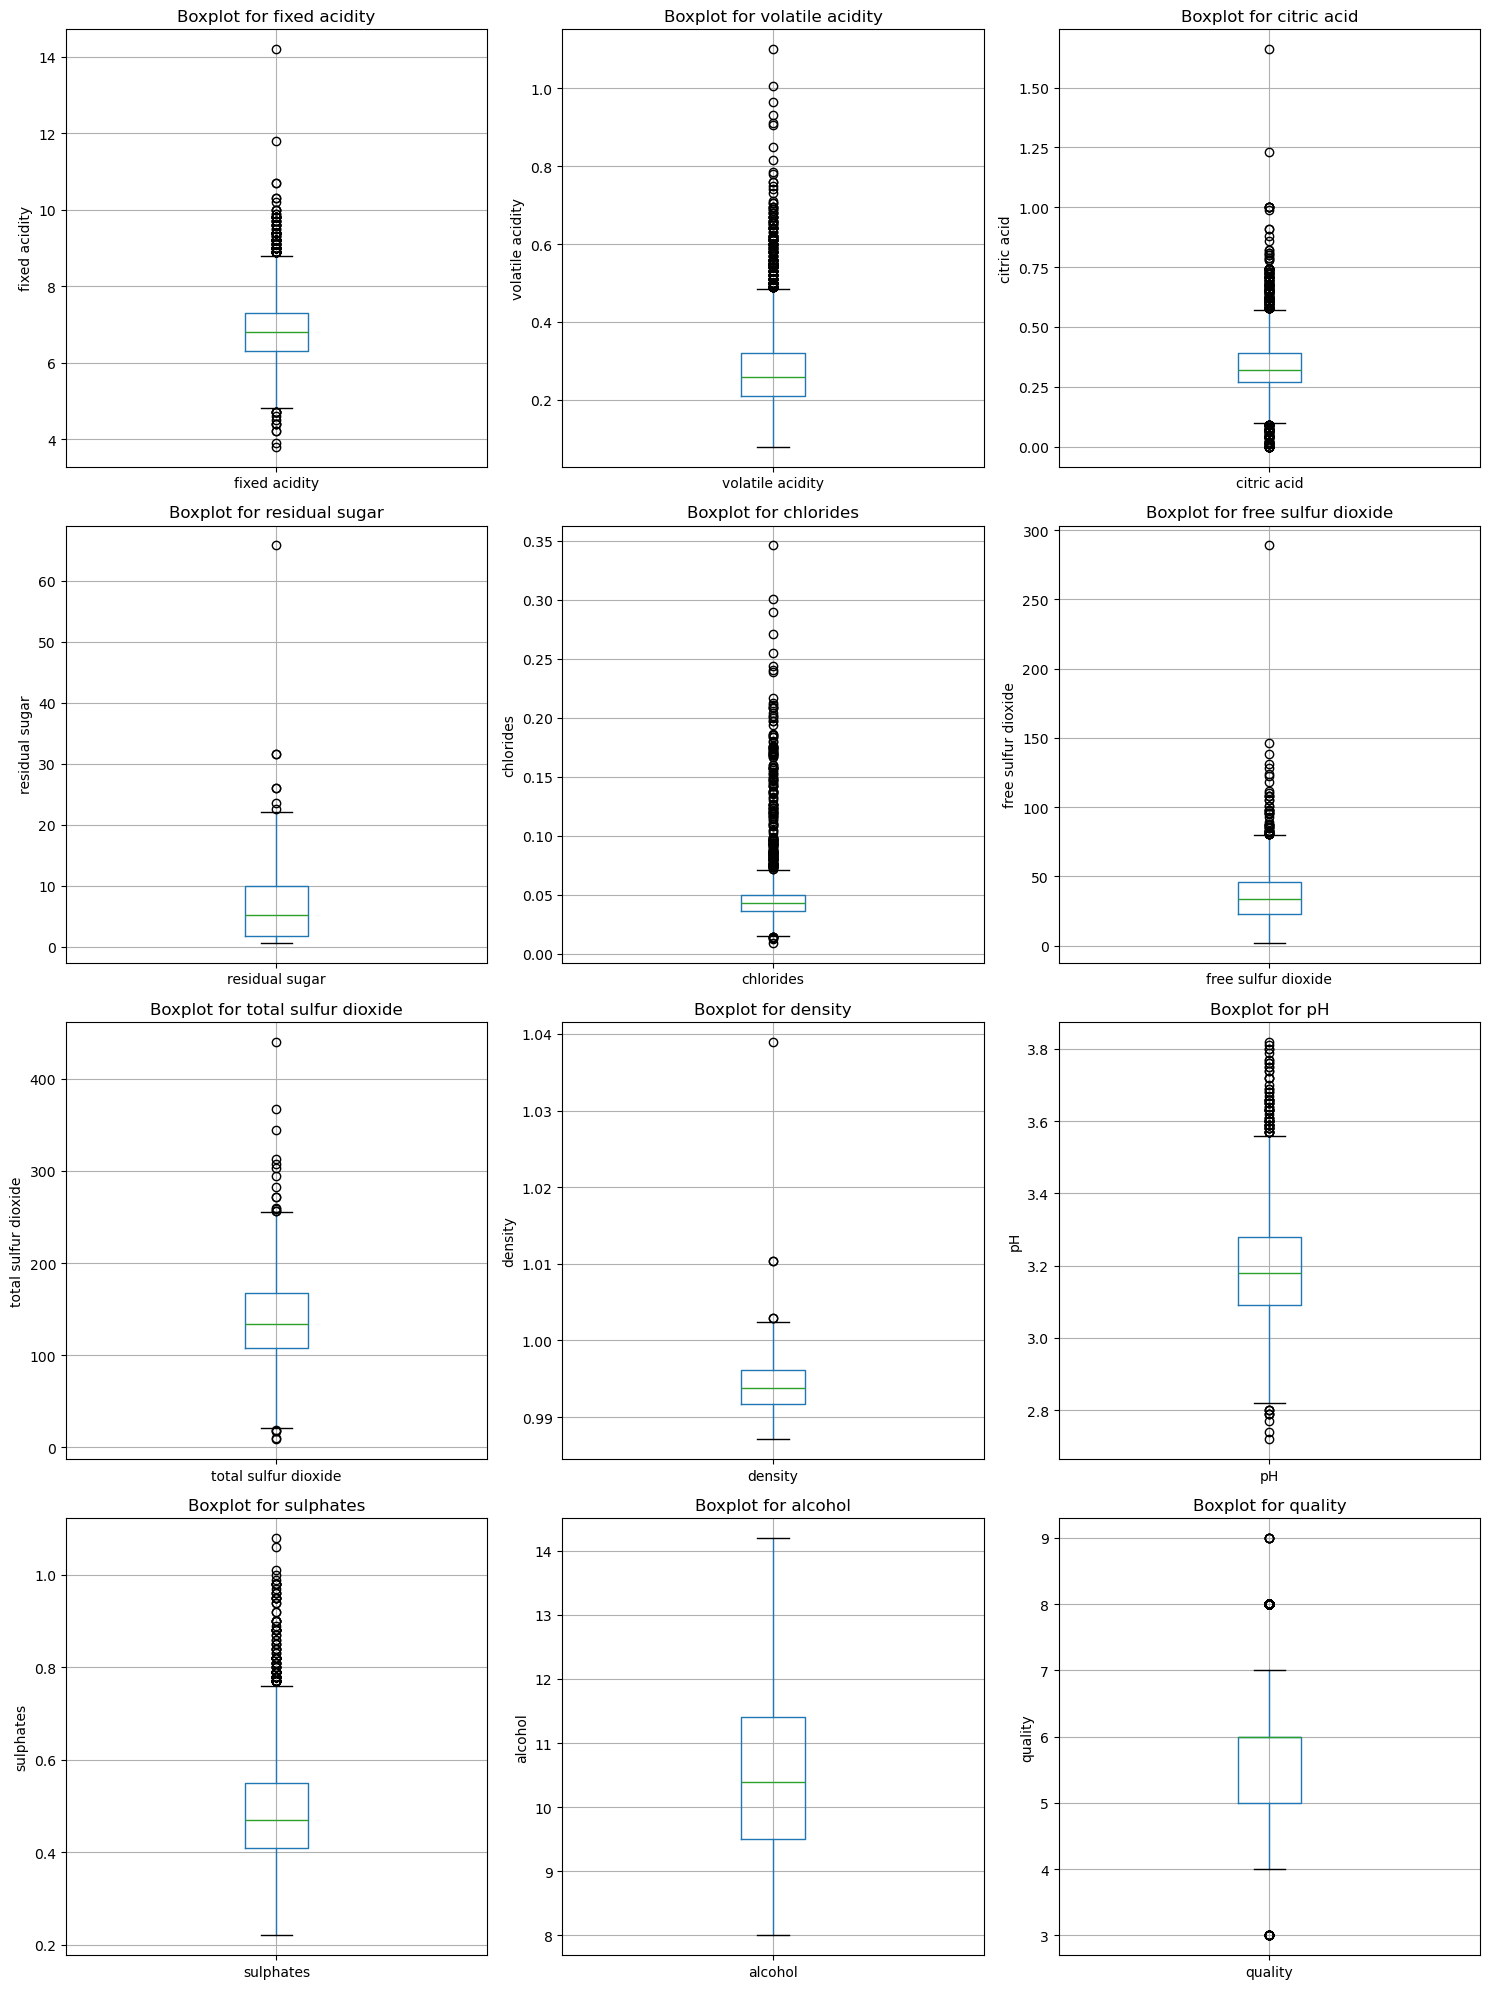

In [6]:
pl.show_boxplots(white_wine_df, layout="grid")

Comparing these with the red wine data, it's immediatly noticable that there is a difference in the residual sugar content and the free sulfur dioxide. We also notice there is one white wine with 65 parts of residual sugar. This is a clear outlier, let's examine that one in more detail.

In [7]:
max_sugar_row = white_wine_df.loc[white_wine_df['residual sugar'].idxmax()]
print(max_sugar_row)

fixed acidity               7.8
volatile acidity          0.965
citric acid                 0.6
residual sugar             65.8
chlorides                 0.074
free sulfur dioxide         8.0
total sulfur dioxide      160.0
density                 1.03898
pH                         3.39
sulphates                  0.69
alcohol                    11.7
quality                       6
type                      white
Name: 2781, dtype: object


This datapoint is also an outlier in regards to density, which makes sense since a high sugar content will lead to a high density. A possible explanation is that this is actually some kind of dessert wine, or not a classical white wine. Since our motive is to be able to predict the quality, and this wine isn't an outlier in quality, we have decided to remove this datapoint.

In [ ]:
white_wine_df = white_wine_df.drop(max_sugar_row.name)


We see a similar situation with free sulfur dioxide, where there is a very clear outlier (289), but this datapoint is also an outlier with regards to quality (3). We have decided not to remove this datapoint, but noted that we want to investigate for a negative correlation between free sulfur dioxide and quality.

In [9]:
max_free_sulfur_row = white_wine_df.loc[white_wine_df['free sulfur dioxide'].idxmax()]
print(max_free_sulfur_row)

fixed acidity               6.1
volatile acidity           0.26
citric acid                0.25
residual sugar              2.9
chlorides                 0.047
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 0.99314
pH                         3.44
sulphates                  0.64
alcohol                    10.5
quality                       3
type                      white
Name: 4745, dtype: object


## Normal distribution

Looking at the histograms, there is a clear difference between the two datasets with the regards to the chemical properties. It looks like citric acid, residual sugar, chlorides might not be normally distributed. For red wines free sulfur dioxide and total sulfur dioxide might not be normally distributed. This might be due to the values being very small and near zero, but never negative, since negative values doesn't make sense in the physical world.

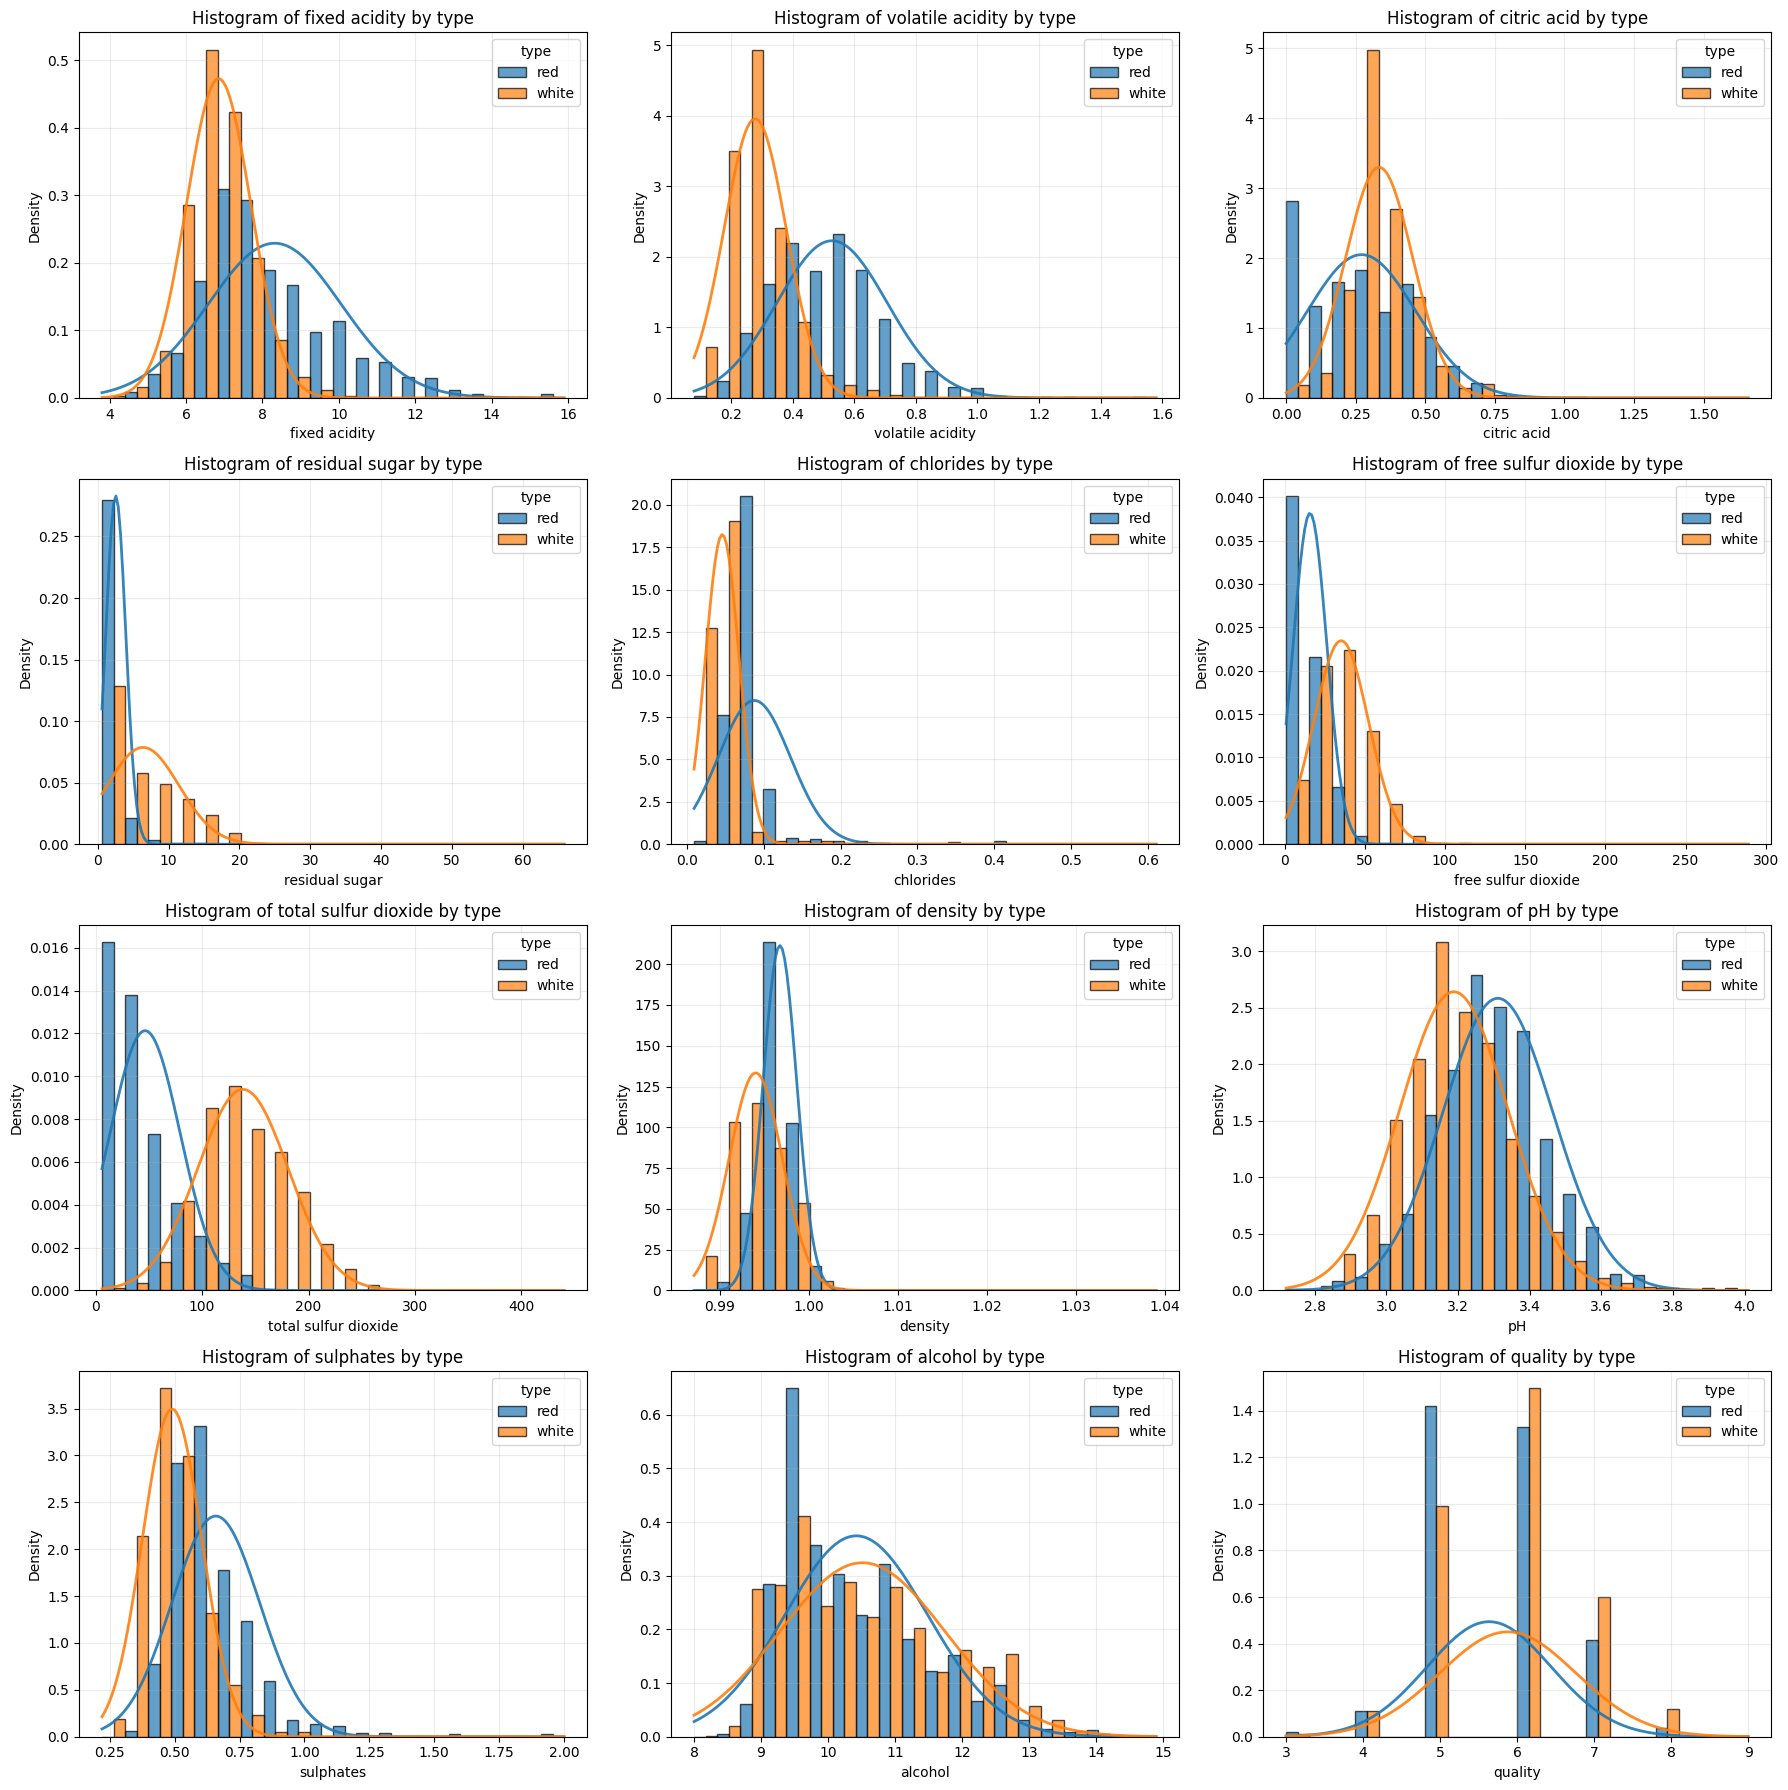

In [ ]:
pl.show_grouped_histograms(combined_wine_df, bins=20, layout="grid", category_col="type", bell_curve=True, max_cols=3)

### Visualizing the Differences Between Red and White Wine Samples

**What does each diagram show?**

Each subplot is a histogram with a density curve, comparing red vs. white wine for a given chemical property or quality score:

- **Fixed acidity** – White wines generally have slightly lower fixed acidity than reds.  
- **Volatile acidity** – Reds tend to have higher volatile acidity.  
- **Citric acid** – Whites tend to have higher citric acid content.  
- **Residual sugar** – Whites generally have more residual sugar, but most wines cluster at low sugar levels.  
  - Reds cluster tightly at low residual sugar (<3 g/L).  
  - Whites show a much wider spread, with many wines above 5–10 g/L.  
- **Chlorides** – Reds and whites overlap, but whites have a longer tail (some with higher chlorides).  
- **Free sulfur dioxide** – Whites have higher values than reds.  
- **Total sulfur dioxide** – Whites also tend to have much higher levels than reds.  
- **Density** – Whites usually show slightly higher density.  
- **pH** – Reds are more acidic (lower pH).  
- **Sulphates** – Reds have higher sulphates.  
- **Alcohol** – Whites tend to have higher alcohol content.  
  - Reds center around 9–11% alcohol, while whites extend more strongly into 11–13% alcohol.  
- **Quality** – Both wines overlap, but whites lean slightly higher on average.  
  - Both types peak around quality levels 5–6.  
  - White wines have a small shift toward higher quality ratings compared to reds.  
  - The difference looks small but consistent, around **0.2–0.3 points** on the quality scale.  
  - **Conclusion:** White wines have slightly higher average quality.  

## Binning the attribute pH

/Users/andy/cphDAT/BI/dat4bi-mp2/dat4bi-mp2/WineDataExplorerPackage/plots.py:280: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].mean()


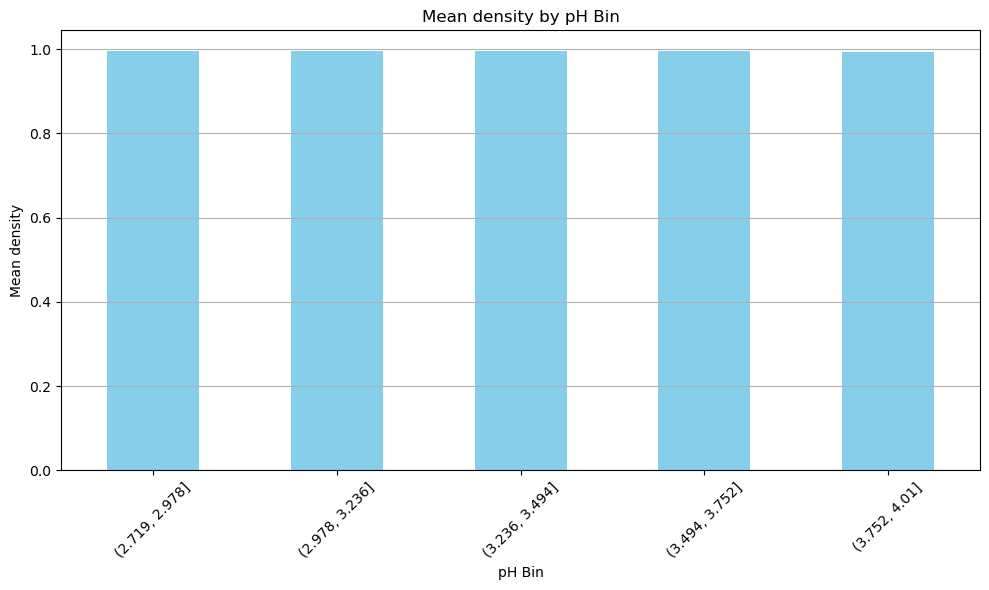

/Users/andy/cphDAT/BI/dat4bi-mp2/dat4bi-mp2/WineDataExplorerPackage/plots.py:280: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_vals = binned_df.groupby('bin')[column_to_plot].mean()


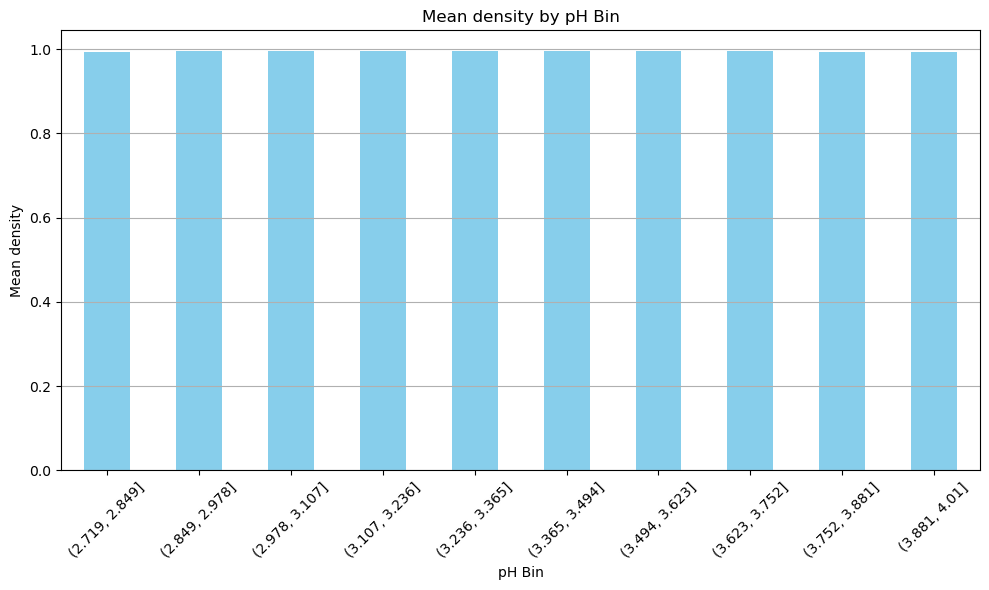

In [16]:
combined_wine_df = combine_dataframes([red_wine_df, white_wine_df])
pl.show_binned_data(combined_wine_df, 5, 'pH', 'density', aggregation_method='mean')
binned_vals=pl.show_binned_data(combined_wine_df, 10, 'pH', 'density', aggregation_method='mean')

We find no meaningful difference in the density of the bins, changing the aggregation method to max does not change the picture.

## Correlation

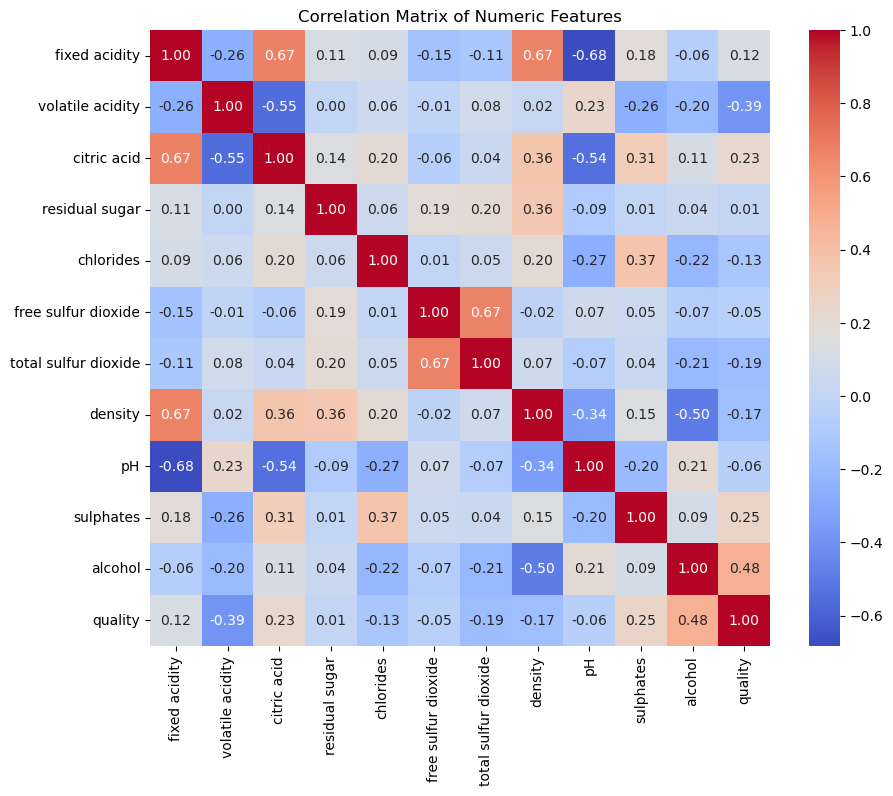

In [10]:
pl.show_correlation_heatmap(red_wine_df)

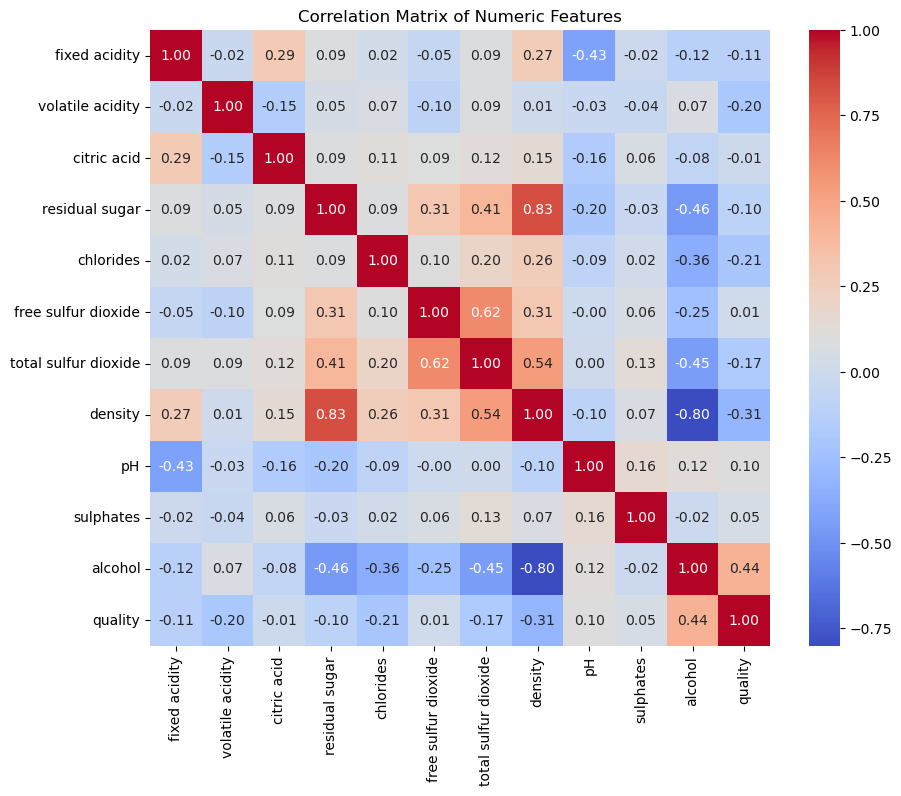

In [11]:
pl.show_correlation_heatmap(white_wine_df)